#### Cross entropy loss - Loss function of Logistic Regression
https://www.youtube.com/watch?v=MztgenIfGgM

Mean Square Error is a Loss function used in Linear Regression. This cannot be used in Logistic Regression.

Cross Entropy Loss is a Loss function used in Logistic Regression

#### Confusion Matrix
- Confusion matrix is a simple table used to measure how well a classification model is performing.
- It compares the predictions made by the model with the actual results and shows where the model was right or wrong.
- This helps you understand where the model is making mistakes so you can improve it.
- It breaks down the predictions into four categories:
- .
- True Positive (TP): The model correctly predicted a positive outcome i.e the actual outcome was positive.
- Actual 1 = Predict 1 = True Positive
- .
- True Negative (TN): The model correctly predicted a negative outcome i.e the actual outcome was negative.
- Actual 0 = Predict 0 = True Negative
- .
- False Positive (FP): The model incorrectly predicted a positive outcome i.e the actual outcome was negative. It is also known as a Type I error
- Actual 0 <> Predict 1 = False Positive
- .
- False Negative (FN): The model incorrectly predicted a negative outcome i.e the actual outcome was positive. It is also known as a Type II error.
- Actual 1 <> Predict 0 = False Negative
- .
- Note:
- True/False is always with respect to the predicted value. True means that the values were accurately predicted, False means that there was an error or wrong prediction.
- The rows represent the actual classes the outcomes should have been. While the columns represent the predictions we have made. Using this table it is easy to see which predictions are wrong.

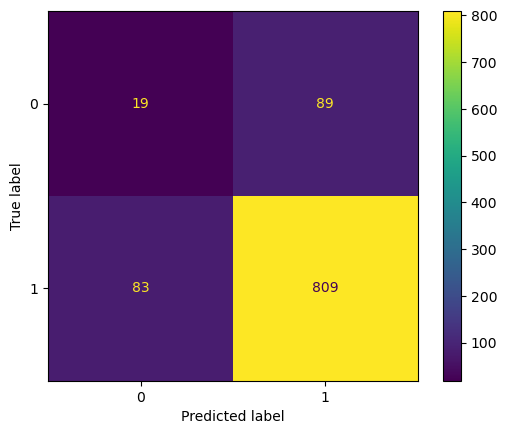

array([[ 19,  89],
       [ 83, 809]], dtype=int64)

In [92]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000) # We can use my_model.predict(x_test) in real time.

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()
confusion_matrix

In [94]:
# Confusion Matrix without graphs

from sklearn.metrics import confusion_matrix
confusion_matrix(actual, predicted)

array([[ 19,  89],
       [ 83, 809]], dtype=int64)

In [211]:
# To understand the above matrix, use ravel() method

from sklearn import metrics
TN, FP, FN, TP = metrics.confusion_matrix(actual, predicted).ravel()
print("TN = ", TN)
print("FP = ", FP)
print("FN = ", FN)
print("TP = ", TP)

TN =  19
FP =  89
FN =  83
TP =  809


#### Above result explained

- True Negative (Top-Left Quadrant)
- False Positive (Top-Right Quadrant)
- False Negative (Bottom-Left Quadrant)
- True Positive (Bottom-Right Quadrant)
- Note:- True means that the values were accurately predicted, False means that there was an error or wrong prediction.

### From Consufion Matrix we can calculate different measures to quantify the quality of the model.
- The matrix provides us with many useful metrics that help us to evaluate our classification model.
- The different measures include: Accuracy, Precision, Sensitivity (Recall), Specificity, and the F-score, explained below.

#### 1. Accuracy
- Accuracy measures how often the model is correct.
- Total correct outcomes / all the outcomes.
- (TP+TN)/(TP+TN+FP+FN)

In [169]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(actual, predicted)
Accuracy

0.828

#### 2. Precision
- Focus is only on Positive.
- Of the positives predicted, what percentage is truly positive?
- Precision does not evaluate the correctly predicted negative cases.
- (TP)/(TP+FP)

In [172]:
from sklearn.metrics import precision_score
Precision = precision_score(actual, predicted)
Precision

0.9008908685968819

#### 3. False Positive Ratio - FPR 
- The proportion of actual negative instances that are incorrectly classified as positive.
- A lower FPR is generally desirable, as it indicates a more specific model that is less prone to misclassifying negative cases as positive. 
- FP / (TN + FP)

In [221]:
from sklearn import metrics

TN, FP, FN, TP = metrics.confusion_matrix(actual, predicted).ravel()
FPR = FP / (TN + FP)
FPR

0.8240740740740741

#### 4. Sensitivity (Recall) - True Positive Ratio(TPR)
- Sensitivity (sometimes called Recall) measures how good the model is at predicting positives.
- Sensitivity is good at understanding how well the model predicts something is positive. From prespective of Positive results.
- Of all the positive cases, what percentage are predicted correctly positive?
- This means it looks at true positives and false negatives (which are positives that have been incorrectly predicted as negative).
- TP / (TP+FN)

In [224]:
from sklearn.metrics import recall_score
Sensitivity_recall = recall_score(actual, predicted)
Sensitivity_recall

0.9069506726457399

#### 5. Specificity - True negative ratio
- Specificity is good at understanding how well the model is at prediciting negative results?
- Specificity is similar to sensitivity, but looks at it from the persepctive of negative results.
- TN / (TN + FP)

In [227]:
# Since it is just the opposite of Recall, we use the recall_score function, taking the opposite position label.

from sklearn.metrics import recall_score
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
Specificity

0.17592592592592593

In [1]:
# Or use the manual derivation.
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
specificity = tn / (tn + fp)
specificity

NameError: name 'actual' is not defined

#### 6. F1 Score
- F-score is the "harmonic mean" of precision and sensitivity.
- It considers both false positive and false negative cases and is good for imbalanced datasets.
- This score does not take into consideration the True Negative values.
- 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))
- or ???? check and confirm
- (Precision * Recall) / (Precision + Recall)

In [232]:
from sklearn.metrics import f1_score
F1_score = f1_score(actual, predicted)
F1_score

0.9039106145251397

#### 7. ROC AUC Curve

https://www.w3schools.com/python/python_ml_auc_roc.asp

AUC curve value close to 1 is a better model

this can be calculated on any type of model, Linear R, Logistic Regre, etc.

Used to determine the best threshold and how we want the TPR/FPR/etc.

Where are we giving the threshold value

what does below parameters signify

In [5]:
from sklearn.metrics import roc_curve

roc_curve(y_test,y_predict)
#fpr - false positive rate
#tpr - true positive rate
# threshold value
#(array([0., 1.]), array([0., 1.]), array([inf,  0.]))
#FPR/TPR/Threshold

NameError: name 'y_test' is not defined

#### roc_auc_score

In [262]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_predict)
#fpr,tpr,threshold

1.0

In [264]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        23

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

